<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#What-is-the-issue-with-correlation-btw-categoricals?" data-toc-modified-id="What-is-the-issue-with-correlation-btw-categoricals?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is the issue with correlation btw categoricals?</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="#One-hot-encoding" data-toc-modified-id="One-hot-encoding-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>One-hot encoding</a></span></li><li><span><a href="#Cramer's-V" data-toc-modified-id="Cramer's-V-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cramer's V</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Categorical features correlation

</font>
</div>

# What is the issue with correlation btw categoricals?
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- Correlation is a measure of the association between two variables. 
- It is easy to calculate and interpret when both variables are numerical, but about the case where they are all categoricals and correlation isn’t defined in that case. How do you subtract yellow from the average of colors? 

</font>
</div>

# Imports
<hr style="border:2px solid black"> </hr>

In [1]:
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
from numpy import cov
import numpy as np
from scipy.stats import spearmanr, kendalltau, pearsonr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib import rcParams

# Load dataset
<hr style="border:2px solid black"> </hr>

In [2]:
df = pd.read_csv("./mushrooms.csv")

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.isna().any().sum()

0

# One-hot encoding
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- One common option to handle this scenario is by first using one-hot encoding, and break each possible option of each categorical feature to 0-or-1 features. This will then allow the use of correlation, but it can easily become too complex to analyse. For example, one-hot encoding converts the 22 categorical features of the mushrooms data-set to a 112-features data-set
- This is not something that can be easily used for gaining new insights. So we still need something else.
    
</font>
</div>

In [5]:
df_oh = pd.get_dummies(df)

In [6]:
correlation_mat = df_oh.corr("pearson")

In [7]:
correlation_mat

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class_e,1.000000,-1.000000,0.182567,-0.023007,-0.018526,-0.163565,0.060664,0.026886,0.195415,-0.023007,...,0.159572,-0.443722,0.107055,0.126123,0.165004,-0.155150,0.138627,-0.323346,-0.112078,0.150087
class_p,-1.000000,1.000000,-0.182567,0.023007,0.018526,0.163565,-0.060664,-0.026886,-0.195415,0.023007,...,-0.159572,0.443722,-0.107055,-0.126123,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087
cap-shape_b,0.182567,-0.182567,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,...,0.158702,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764
cap-shape_c,-0.023007,0.023007,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,...,-0.009456,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-shape_f,-0.018526,0.018526,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,...,-0.075804,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,-0.155150,0.155150,0.010113,0.065707,-0.052326,0.235108,-0.021242,-0.096639,-0.191987,0.065707,...,-0.143906,0.248675,-0.174539,-0.268668,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553
habitat_m,0.138627,-0.138627,0.374316,-0.004286,-0.129312,-0.065047,-0.012142,-0.004529,-0.122077,-0.004286,...,0.152473,-0.144434,-0.099772,-0.153579,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041
habitat_p,-0.323346,0.323346,-0.095178,-0.008985,0.021891,0.090538,-0.025458,-0.029042,-0.086727,-0.008985,...,-0.125366,0.169228,0.040714,-0.322005,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986
habitat_u,-0.112078,0.112078,-0.052871,-0.004835,0.030636,-0.073380,0.288697,0.002845,-0.011913,-0.004835,...,0.130450,0.001180,-0.042888,-0.173254,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889


In [8]:
mask = np.zeros_like(correlation_mat, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True
correlation_mat[mask] = np.nan

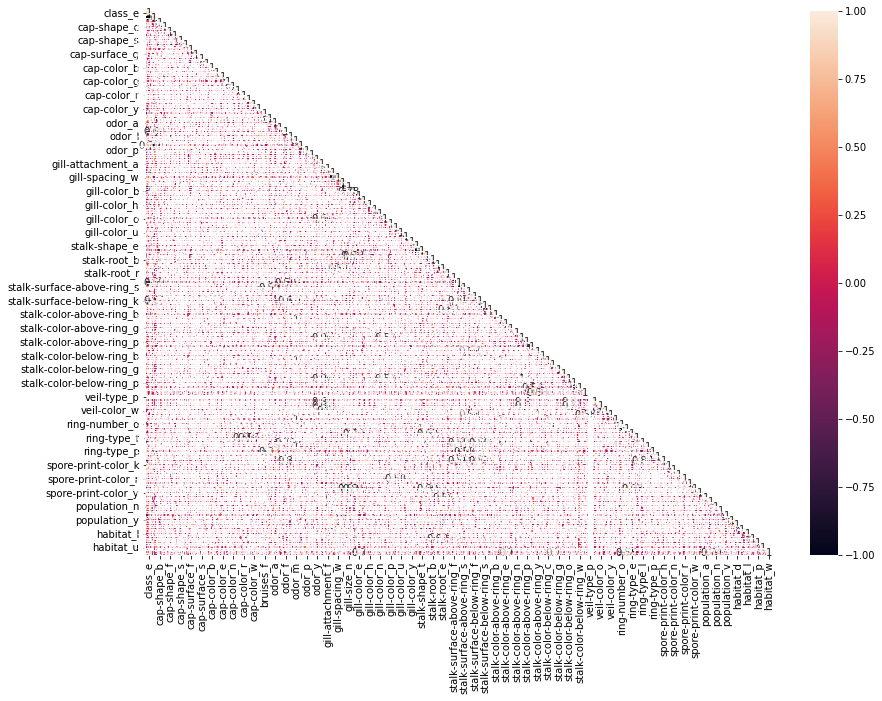

In [9]:
rcParams["figure.figsize"] = 14,10
rcParams["font.size"] = 10

sns.heatmap(correlation_mat, annot = True)
plt.show()

# Cramer's V
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- It is used to evaluate the association btw two categorical features where the ontigency matrix is larger than 2x2, for instance a 2x3 matrix. In this case Phi is not appropriate.
- It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:
- Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. 
- Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t.
- Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y.
    
</font>
</div>

In [10]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)

    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [11]:
cramers_v(df["class"], df["cap-shape"])

0.24432985008184127

In [12]:
df.shape

(8124, 23)

In [13]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [29]:
dummy = np.zeros([23, 23])
for i, i_value in enumerate(df.columns):
    for j, j_value in enumerate(df.columns):
        dummy[i,j] = cramers_v(df[i_value], df[j_value])

/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_81738/2429184372.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_81738/2429184372.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_81738/2429184372.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_81738/2429184372.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_81738/2429184372.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/var/folders/5x/lyqr8wv50

/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_81738/2429184372.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_81738/2429184372.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [30]:
dummy

array([[0.99975347, 0.24432985, 0.19599664, 0.21588883, 0.50118849,
        0.97055796, 0.12795134, 0.34789659, 0.53967702, 0.67987666,
        0.10117001, 0.4062239 , 0.5876657 , 0.57455095, 0.52394322,
        0.51379947,        nan, 0.15222238, 0.2142115 , 0.60290025,
        0.75203628, 0.48677453, 0.43932291],
       [0.24432985, 1.        , 0.202242  , 0.16822052, 0.25441469,
        0.24357735, 0.15298873, 0.07784907, 0.34595604, 0.23227377,
        0.30611912, 0.35938819, 0.15815007, 0.10948714, 0.21242738,
        0.16753357,        nan, 0.22312413, 0.19788326, 0.20674861,
        0.24910119, 0.24007375, 0.26984181],
       [0.19599664, 0.202242  , 1.        , 0.22284147, 0.13300356,
        0.23641565, 0.20997672, 0.33769639, 0.27676458, 0.25502304,
        0.07639457, 0.31392686, 0.14286072, 0.16833081, 0.25056072,
        0.25557827,        nan, 0.13301368, 0.09727846, 0.22366883,
        0.23053886, 0.26095167, 0.24957749],
       [0.21588883, 0.16822052, 0.22284147, 1.   

In [31]:
mask = np.zeros_like(dummy, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True
dummy[mask] = np.nan

In [32]:
dummy

array([[0.99975347,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [0.24432985, 1.        ,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [0.19599664, 0.202242  , 1.        ,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [0.21588883, 0.16822052, 0.22284147, 1.   

In [33]:
dummy = pd.DataFrame(dummy, columns=df.columns)

In [34]:
dummy = dummy.rename(index={i:j for i,j in enumerate(df.columns)})

In [35]:
{str(i):j for i,j in enumerate(df.columns)}

{'0': 'class',
 '1': 'cap-shape',
 '2': 'cap-surface',
 '3': 'cap-color',
 '4': 'bruises',
 '5': 'odor',
 '6': 'gill-attachment',
 '7': 'gill-spacing',
 '8': 'gill-size',
 '9': 'gill-color',
 '10': 'stalk-shape',
 '11': 'stalk-root',
 '12': 'stalk-surface-above-ring',
 '13': 'stalk-surface-below-ring',
 '14': 'stalk-color-above-ring',
 '15': 'stalk-color-below-ring',
 '16': 'veil-type',
 '17': 'veil-color',
 '18': 'ring-number',
 '19': 'ring-type',
 '20': 'spore-print-color',
 '21': 'population',
 '22': 'habitat'}

In [36]:
dummy

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,0.999753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape,0.244330,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-surface,0.195997,0.202242,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-color,0.215889,0.168221,0.222841,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bruises,0.501188,0.254415,0.133004,0.215101,0.999747,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odor,0.970558,0.243577,0.236416,0.330517,0.660201,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-attachment,0.127951,0.152989,0.209977,0.245736,0.136129,0.259923,0.997556,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-spacing,0.347897,0.077849,0.337696,0.398593,0.298946,0.428647,0.069560,0.999545,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-size,0.539677,0.345956,0.276765,0.469156,0.369182,0.760318,0.107581,0.107406,0.999712,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-color,0.679877,0.232274,0.255023,0.280178,0.649324,0.388712,0.779340,0.323690,0.783249,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


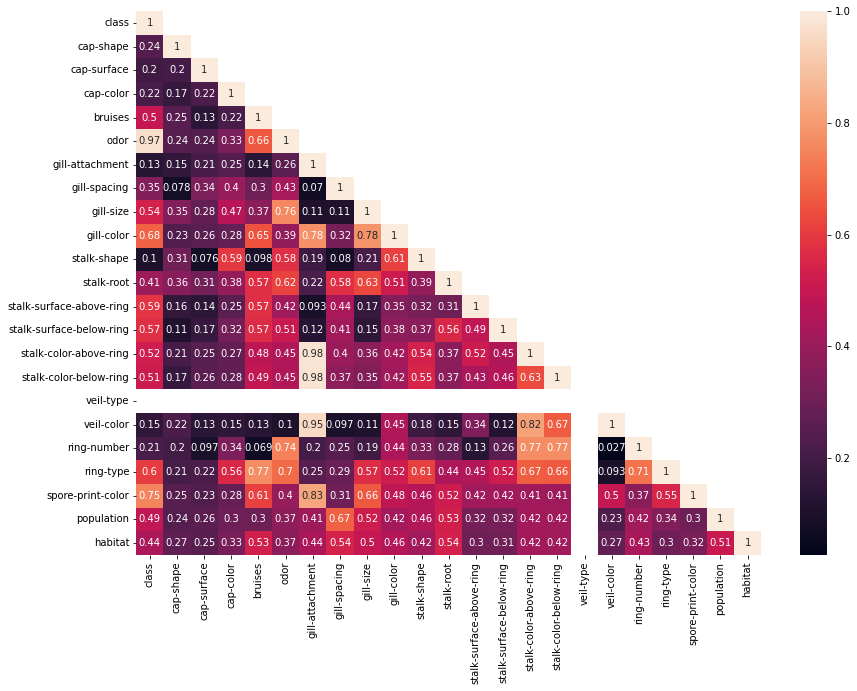

In [37]:
rcParams["figure.figsize"] = 14,10
rcParams["font.size"] = 10

sns.heatmap(dummy, annot = True)
plt.show()

<div class="alert alert-info">
<font color=black>

- Just by looking at this heat-map we can see that the odor is highly associated with the class (edible/poisonous) of the mushroom, and that the gill-attachment feature is highly associated with three others.
    
</font>
</div>

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- [The search for categorical correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
- [Mushroom classificaiton](https://www.kaggle.com/datasets/uciml/mushroom-classification)
- [Point-biserial correlation, Phi, & Cramer's V](https://web.pdx.edu/~newsomj/pa551/lectur15.htm)
    
</font>
</div>